In [1]:
import pandas as pd
import numpy as np

train_df= pd.read_csv('C:\\Users\\shakshi\\Desktop\\dataset\\ann-train.txt',sep=" ",header=None)
test_df= pd.read_csv('C:\\Users\\shakshi\\Desktop\\dataset\\ann-test.txt',sep=" ",header=None)

train_df=train_df.drop(train_df.columns[[22,23]], axis=1)  # df.columns is zero-based pd.Index
test_df=test_df.drop(test_df.columns[[22,23]], axis=1)  

In [2]:
train_df.columns=['Age', 'Sex', 'On_thyroxine', 'Query_on_thyroxine', 'On_antithyroid_medication', 'Sick', 'Pregnant', 'Thyroid_surgery', 'I131_treatment', 'Query_hypothyroid', 'Query_hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','Output']
test_df.columns=['Age', 'Sex', 'On_thyroxine', 'Query_on_thyroxine', 'On_antithyroid_medication', 'Sick', 'Pregnant', 'Thyroid_surgery', 'I131_treatment', 'Query_hypothyroid', 'Query_hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','Output']

In [3]:
# To check Null values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid_surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Output                       0
dtype: int64
Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid_surgery              0
I131_treatment               0
Query_hypothyroid         

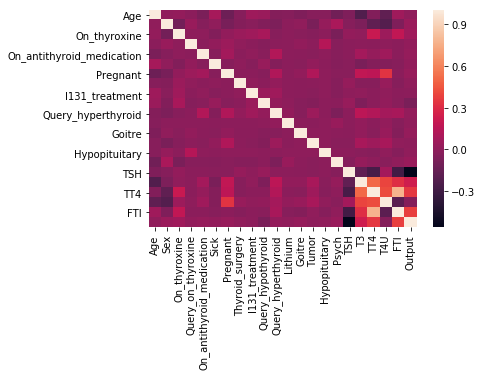

In [4]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import seaborn as sns
# To check correlation between parameters
sns.heatmap(train_df.corr())

1      93
2     191
3    3488
Name: Output, dtype: int64
1      73
2     177
3    3178
Name: Output, dtype: int64


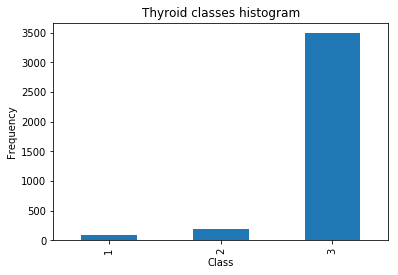

In [5]:
count_classes = pd.value_counts(train_df['Output'], sort = True).sort_index()
print(count_classes)

count_classes.plot(kind = 'bar')
plt.title("Thyroid classes histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


count_classes2 = pd.value_counts(test_df['Output'], sort = True).sort_index()
print(count_classes2)

Text(0,0.5,'Frequency')

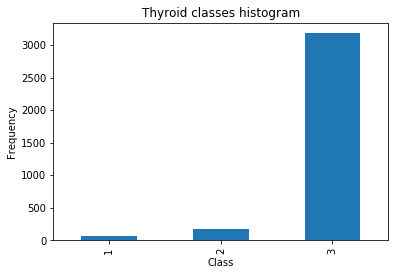

In [6]:
count_classes2.plot(kind = 'bar')
plt.title("Thyroid classes histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [7]:
X_train= train_df.drop(['Output'],axis=1)
y_train=train_df['Output']
X_test= test_df.drop(['Output'],axis=1)
y_test=test_df['Output']

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(3772, 21)
(3772,)
(3428, 21)
(3428,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_pred= logreg.predict(X_test)
log_acc=logreg.score(X_test, y_test) * 100

print("Logistic Regression Accuracy:",log_acc)
print("F1 Score",f1_score(y_test, log_pred, average="macro"))
print("Precision Score",precision_score(y_test, log_pred, average="macro"))
print("Recall Score",recall_score(y_test, log_pred, average="macro"))  
# A Plain Algo can give 92.707% accuracy- as imbalanced dataset

Logistic Regression Accuracy: 92.85297549591598
F1 Score 0.36369651321931284
Precision Score 0.6428084526244036
Recall Score 0.35616438356164387


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
#Multinomial Logistic Model

mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
mul_lr_pred= mul_lr.predict(X_test)
print ("Logistic regression Multinomial Accuracy :", mul_lr.score(X_test, y_test) * 100)
print(confusion_matrix(y_test,mul_lr_pred))
print("F1 Score",f1_score(y_test, mul_lr_pred, average="macro"))


Logistic regression Multinomial Accuracy : 93.05717619603267
[[  12    1   60]
 [   0    0  177]
 [   0    0 3178]]
F1 Score 0.41546857481047933


In [10]:
from sklearn import svm
svmlin = svm.LinearSVC()
svmlin.fit(X_train, y_train) 
svm_pred= svmlin.predict(X_test)

acc= svmlin.score(X_test,y_test)*100
print("Linear SVM Accuracy:", acc)
print(confusion_matrix(y_test,svm_pred))
print("F1 Score",f1_score(y_test, svm_pred, average="macro"))

Linear SVM Accuracy: 93.87397899649942
[[  44    0   29]
 [   0    0  177]
 [   4    0 3174]]
F1 Score 0.565083589786243


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
svm_rbf = svm.SVC(decision_function_shape='ovo')
svm_rbf.fit(X_train, y_train) 
print("RBF SVM Accuracy: ",svm_rbf.score(X_test,y_test)*100)


RBF SVM Accuracy:  92.7071178529755


In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
svmlin.fit(X_train_res, y_train_res) 
svm_pred= svmlin.predict(X_test)

acc= svmlin.score(X_test,y_test)*100
print("Linear SVM Accuracy:", acc)
print(confusion_matrix(y_test,svm_pred))
print("F1 Score",f1_score(y_test, svm_pred, average="macro"))

Linear SVM Accuracy: 86.05600933488915
[[  69    4    0]
 [   4   98   75]
 [  58  337 2783]]
F1 Score 0.6389287566342882


In [16]:
print(X_train.shape)
print(X_train_res.shape)

(3772, 21)
(10464, 21)


In [22]:
print(np.count_nonzero(y_train==1))
print(np.count_nonzero(y_train==2))
print(np.count_nonzero(y_train==3))

93
191
3488


In [23]:
print(np.count_nonzero(y_train_res==1))
print(np.count_nonzero(y_train_res==2))
print(np.count_nonzero(y_train_res==3))

3488
3488
3488


In [26]:
#Multinomial Logistic Model

mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train_res, y_train_res)
mul_lr_pred= mul_lr.predict(X_test)
print ("Logistic regression Multinomial Accuracy :", mul_lr.score(X_test, y_test) * 100)
print(confusion_matrix(y_test,mul_lr_pred))
print("F1 Score",f1_score(y_test, mul_lr_pred, average="macro"))

Logistic regression Multinomial Accuracy : 76.22520420070012
[[  66    6    1]
 [   0  113   64]
 [  39  705 2434]]
F1 Score 0.6082808051247625


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
 
print ("Test Accuracy  : ", clf.score(X_test,y_test))
print (" Confusion matrix :\n", confusion_matrix(y_test, predictions))
print("F1 Score",f1_score(y_test, predictions, average="macro"))

Test Accuracy  :  0.9927071178529755
 Confusion matrix :
 [[  72    0    1]
 [   0  177    0]
 [   9   15 3154]]
F1 Score 0.9634889841242166


In [38]:
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)
predictions = clf.predict(X_test)
 
print ("Test Accuracy  : ", clf.score(X_test,y_test))
print (" Confusion matrix:\n ", confusion_matrix(y_test, predictions))
print("F1 Score",f1_score(y_test, predictions, average="macro"))

Test Accuracy  :  0.9900816802800467
 Confusion matrix:
  [[  71    0    2]
 [   0  176    1]
 [  11   20 3147]]
F1 Score 0.9514852728410391


In [39]:
# Random Forest without over sampling works best in terms pf acuracy as weel as F1 score in Thyroid dataset

In [40]:
# Need to try Artificial Neural Network for it